# **Cartoon popularity anlysis**

ในโปรเจ็คนี้เราจะทำ web scraping ในการดึงข้อมูลจากเว็บไซต์อ่านการ์ตูนที่ชื่อว่า webtoon เพื่อนำข้อมูลมาวิเคราะห์ยอดความนิยมของการ์ตูนชนิดต่างใน webtoon

## **1. ติดตั้ง library  ที่จำเป็น**

In [1]:
!pip install requests
!pip install beautifulsoup4
!git clone 'https://github.com/jeffmcneill/thai-font-collection.git'

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import re


Cloning into 'thai-font-collection'...
remote: Enumerating objects: 1081, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 1081 (delta 71), reused 174 (delta 67), pack-reused 898
Receiving objects: 100% (1081/1081), 38.16 MiB | 26.62 MiB/s, done.
Resolving deltas: 100% (574/574), done.


เพิ่มฟ้อนด์ภาษาไทย

In [2]:
front = './thai-font-collection/downloadable-free-thai-fonts/dip-sipa/TH-Sarabun-New-Regular.ttf'
mpl.font_manager.fontManager.addfont(front)
mpl.rc('font', family='TH Sarabun New', size=20)

## **2. การเก็บข้อมูล**

เก็บข้อมูลจาก [webtoon](https://www.webtoons.com/th/genre) โดยการใช้ web scraping ข้อมูลให้อยู่ในรูปแบบของ dataframe

ดึงข้อมูล url link ของการ์ตูนแต่ละเรื่อง

In [3]:
url = 'https://www.webtoons.com/th/genre'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
results_link = soup.find_all('ul', {'class':'card_lst'})
df1= pd.DataFrame(columns=['subject', 'author', 'like'])

link_df = []
for link in results_link:
  for sub in link.find_all('li'):
    link_df.append(sub.find('a').attrs['href'])

ดึงข้อมูล ชื่อเรื่อง ผู้แต่ง และจำนวนคนที่ชอบการ์ตูนเรื่องนั้น รวมเข้ากับ url link ให้อยู่ในรูปแบบ dataframe

In [4]:
results = soup.find_all('div', {'class': 
    'info'})
for tag in results:

    temp = {}
    
    temp['subject'] = tag.find('p', 
        {'class': 'subj'}).text
    
    temp['author'] = tag.find('p', 
        {'class': 'author'}).text

    sub = tag.find_all('p', {'class': 
    'grade_area'})

    for s in sub:

      temp['like'] = s.find('em', {'class': 'grade_num'}).text

    df1 = df1.append(temp, ignore_index=True)

df1['link'] = link_df
df1 = df1.drop_duplicates()
df1

,subject,author,like,link
0,ความลับของนางฟ้า,เหมียว,5.2M,https://www.webtoons.com/th/romance/goddess/li...
1,การแต่งงานครั้งใหม่ของจักรพรรดินี,อัลฟาทาร์ต / ซุมพุล,1.7M,https://www.webtoons.com/th/romantic-fantasy/r...
2,เมื่อฉันต้องไปอยู่โรงเรียนชายล้วน,Caramel_Kung,"77,902",https://www.webtoons.com/th/romance/boys-highs...
3,เสือดำขย้ำหัวใจ,ยอซึลกี / Teava,"241,523",https://www.webtoons.com/th/romantic-fantasy/i...
4,ตื่นมาอีกทีก็มีพระเอกนอนอยู่ข้างๆ ?!,MSG / Teava,"651,763",https://www.webtoons.com/th/romantic-fantasy/f...
...,...,...,...,...
799,HOPEfully soon,INVERT,"21,809",https://www.webtoons.com/th/romance/hopefully-...
817,เล่าเรื่องพ่อ The Series,Various Artists,"45,716",https://www.webtoons.com/th/heartwarming/the-s...
823,จิงเกิ้ลจังเกิ้ล เพื่อนป่าฮาเฮ,ยงจิน คิม,"30,624",https://www.webtoons.com/th/heartwarming/jingl...
833,STAY HOME STAY SAFE,WEBTOON,"70,180",https://www.webtoons.com/th/tiptoon/stay-stron...


นำ url ที่ได้มาใช้ในการดึงข้อมูล ประเภทของการ์ตูน ยอดผู้ติดตาม เรตติ้ง จำนวนตอน และวันที่อัปโหลด มาอยู่ใน dataframe

In [5]:
genre = []
subscri = []
rating = []
episode = []
upload_day = []
for url_link in df1['link']:
  response = requests.get(url_link)
  soup = BeautifulSoup(response.text, 'html.parser')
  genre.append(soup.find('h2').text)
  rating.append(soup.find('em', {'id': '_starScoreAverage'}).text)
  subscri.append(soup.find('em', {'class': 'cnt'}).text)
  episode.append(soup.find_all('ul', {'id': '_listUl'})[0].find('li').attrs['data-episode-no'])
  upload_day.append(soup.find_all('p', {'class': 'day_info'})[0].text)

df2 = pd.DataFrame(data={'genre':genre, 'rating':rating, 'subscribe':subscri, 'episode':episode, 'upload':upload_day})

concat ทั้งสอง dataframe เข้าด้วยกัน
 

In [6]:
webtoon = pd.concat([df1.reset_index(drop=True), df2], axis=1)
webtoon

,subject,author,like,link,genre,rating,subscribe,episode,upload
0,ความลับของนางฟ้า,เหมียว,5.2M,https://www.webtoons.com/th/romance/goddess/li...,โรแมนซ์,9.77,2.2M,161,อัพทุกๆ วันอังคาร
1,การแต่งงานครั้งใหม่ของจักรพรรดินี,อัลฟาทาร์ต / ซุมพุล,1.7M,https://www.webtoons.com/th/romantic-fantasy/r...,โรแมนซ์แฟนตาซี,9.88,636.7K,79,อัพทุกๆ วันเสาร์
2,เมื่อฉันต้องไปอยู่โรงเรียนชายล้วน,Caramel_Kung,"77,902",https://www.webtoons.com/th/romance/boys-highs...,โรแมนซ์,9.84,159.8K,7,อัพทุกๆ วันพุธ
3,เสือดำขย้ำหัวใจ,ยอซึลกี / Teava,"241,523",https://www.webtoons.com/th/romantic-fantasy/i...,โรแมนซ์แฟนตาซี,9.93,262.3K,15,อัพทุกๆ วันอังคาร
4,ตื่นมาอีกทีก็มีพระเอกนอนอยู่ข้างๆ ?!,MSG / Teava,"651,763",https://www.webtoons.com/th/romantic-fantasy/f...,โรแมนซ์แฟนตาซี,9.84,327.1K,40,อัพทุกๆ วันอาทิตย์
...,...,...,...,...,...,...,...,...,...
402,HOPEfully soon,INVERT,"21,809",https://www.webtoons.com/th/romance/hopefully-...,โรแมนซ์,9.72,22.2K,17,อัพทุกๆ วันเสาร์
403,เล่าเรื่องพ่อ The Series,Various Artists,"45,716",https://www.webtoons.com/th/heartwarming/the-s...,อบอุ่นหัวใจ,9.88,50.6K,6,จบแล้ว
404,จิงเกิ้ลจังเกิ้ล เพื่อนป่าฮาเฮ,ยงจิน คิม,"30,624",https://www.webtoons.com/th/heartwarming/jingl...,อบอุ่นหัวใจ,8.97,15.1K,101,จบแล้ว
405,STAY HOME STAY SAFE,WEBTOON,"70,180",https://www.webtoons.com/th/tiptoon/stay-stron...,ทิปตูน,9.83,27.6K,30,จบแล้ว


## **3. ตั้งคำถาม**

  * การ์ตูนใน webtoon ประเภทไหนที่เป็นที่นิยมมากที่สุด?
  * จำนวนตอนของการ์ตูนมีผลต่อความนิยมอย่างไร?
  * วันที่อัปโหลดการ์ตูนมีผลต่อความนิยมอย่างไร?





## **4. สร้างฐานข้อมูล**

### **1. ทำความสะอาดข้อมูล**

ลบ comma ระหว่างตัวเอง

In [7]:
webtoon['like'] = webtoon['like'].str.replace(',','')

เปลี่ยน Abbreviated numbers เป็น plain number

In [8]:

def change_num(num):
  if num[-1] == 'M':
    number = float(num[:-1])*1000000
  elif num[-1] == 'K':
    number = float(num[:-1])*1000
  else :
    number = float(num)
  return number

webtoon['like'] = [change_num(n) for n in webtoon['like'] ]
webtoon['subscribe'] = [change_num(n) for n in webtoon['subscribe'] ]

ลบข้อความที่ไม่จำเป็นออกจากวันที่อัพโหลด

In [9]:
webtoon['upload'].value_counts()

จบแล้ว                             211
อัพทุกๆ วันพฤหัสบดี                 31
อัพทุกๆ วันศุกร์                    29
อัพทุกๆ วันจันทร์                   28
อัพทุกๆ วันเสาร์                    27
อัพทุกๆ วันอังคาร                   27
อัพทุกๆ วันพุธ                      26
อัพทุกๆ วันอาทิตย์                  25
อัพทุกๆ อังคาร, พุธ                  1
อัพทุกๆ ศุกร์, เสาร์, อาทิตย์        1
อัพทุกๆ จันทร์, อังคาร, อาทิตย์      1
Name: upload, dtype: int64

In [10]:
days = []
for txt in webtoon['upload']:
  if txt != 'จบแล้ว':
    days.append(txt.split('ๆ ')[1])
  else :
    days.append(txt)

webtoon['upload'] = days
webtoon['upload'].value_counts()

จบแล้ว                     211
วันพฤหัสบดี                 31
วันศุกร์                    29
วันจันทร์                   28
วันเสาร์                    27
วันอังคาร                   27
วันพุธ                      26
วันอาทิตย์                  25
ศุกร์, เสาร์, อาทิตย์        1
จันทร์, อังคาร, อาทิตย์      1
อังคาร, พุธ                  1
Name: upload, dtype: int64

### **2. การจัดรูปแบบข้อมูล**

เพิ่ม column การ์ตูนจบแล้วหรือยังอัพเดตอยู่

In [ ]:
webtoon['present'] = webtoon['upload']
for i in range(webtoon.shape[0]):
  if webtoon['upload'][i] != 'จบแล้ว' :
    webtoon['present'][i] = 'ยังไม่จบ'
  else :
    webtoon['present'][i] = webtoon['upload'][i]

เปลี่ยน datatype

In [12]:
webtoon.dtypes

subject       object
author        object
like         float64
link          object
genre         object
rating        object
subscribe    float64
episode       object
upload        object
present       object
dtype: object

In [13]:
webtoon['rating'] = webtoon['rating'].astype('float64')
webtoon['episode'] = webtoon['episode'].astype('float64')

เพิ่ม column จำนวนยอดไลค์เฉลี่ยต่อตอน

In [14]:
webtoon['avg_like'] = webtoon['like'] / webtoon['episode']
webtoon['avg_like'] = [round(like, 2) for like in webtoon['avg_like'] ]

## **5. การหาคำตอบจากข้อมูล**

แสดงการกระจายตัวของข้อมูลด้วย pairplot


<Figure size 1080x360 with 0 Axes>

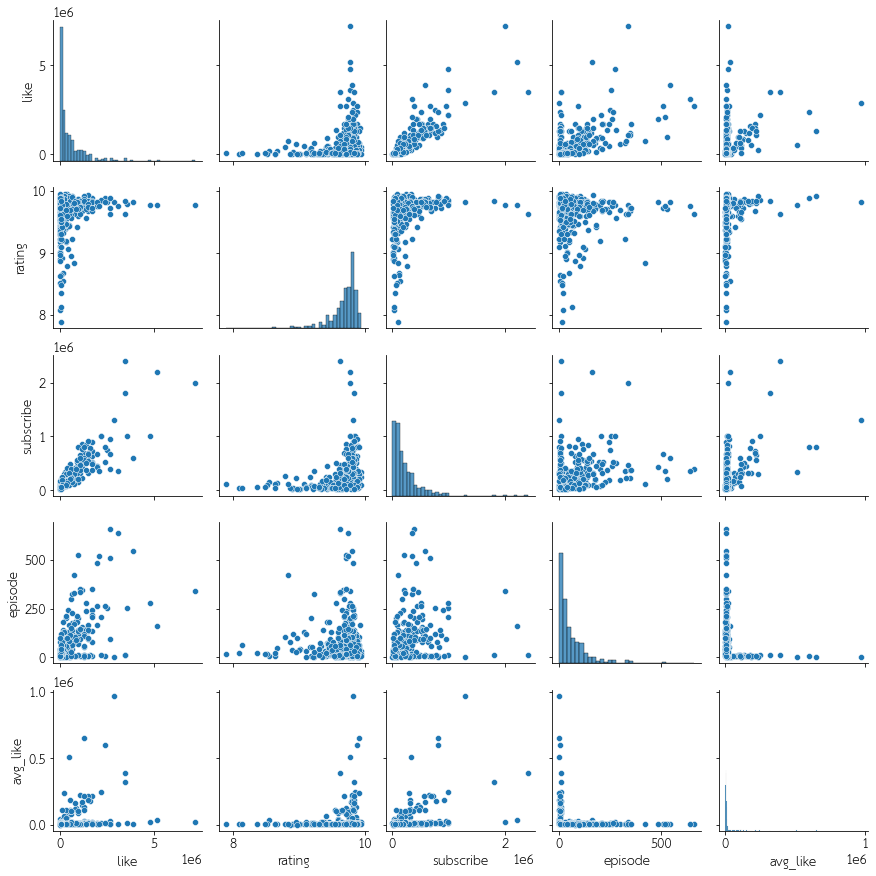

In [15]:
plt.figure(figsize=(15,5))
sns.pairplot(webtoon)

จะเห็นว่าการกระจายตัวของข้อมูลจะเป็นแบบ skewed distribution การใช้ mean ในการเป็นตัวแทนของข้อมูลอาจจะไม่เหมาะสม

### **การ์ตูนประเภทไหนมีความนิยมมากที่สุดในเว็บตูน?**

แสดงกราฟ bar plot แสดง median ของ rating ของแต่ละประเภทของการ์ตูน

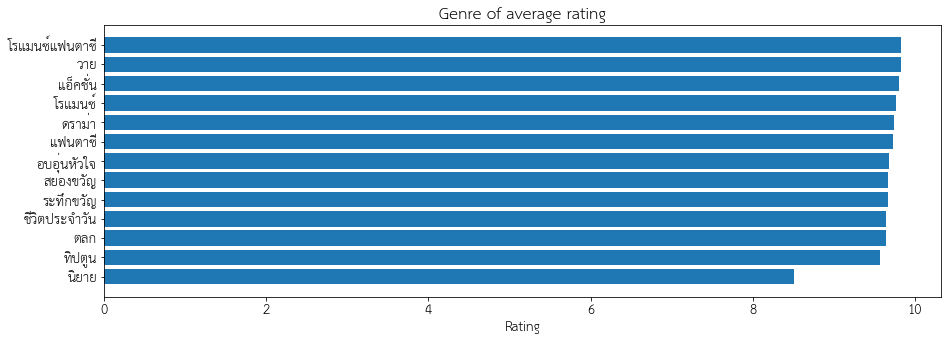

In [16]:
genre_rating2 = webtoon.groupby(['genre'])["rating"].median().sort_values(ascending=True)
plt.figure(figsize=(15,5))
plt.barh(genre_rating2.index, genre_rating2.values)
plt.title('Genre of average rating')
plt.xlabel('Rating')
plt.show()


แสดงกราฟ bar plot แสดงยอด median ของ like ของแต่ละประเภทของการ์ตูน

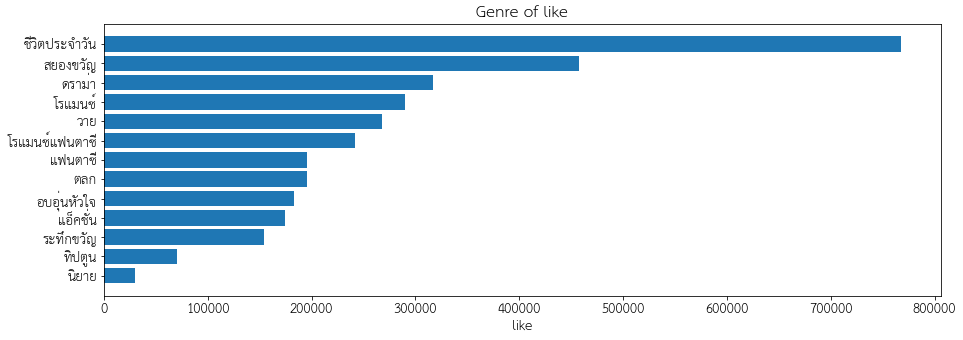

In [17]:
genre_grade2 = webtoon.groupby(['genre'])["like"].median().sort_values(ascending=True)
plt.figure(figsize=(15,5))
plt.barh(genre_grade2.index, genre_grade2.values)
plt.title('Genre of like')
plt.xlabel('like')
plt.show()

จะเห็นได้ว่าวัดยอดความนิยมจากยอดไลค์อาจจะไม่สามารถทำได้เนื่องจาก การ์ตูนแต่ละเรื่องมีจำนวนตอนไม่เท่ากัน จึงต้องวัดจากยอดไลค์เฉลี่ยต่อตอน

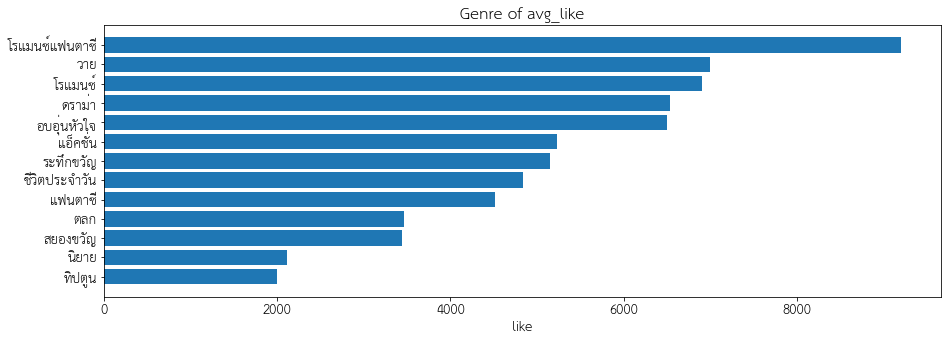

In [18]:
genre_ave_like = webtoon.groupby(['genre'])["avg_like"].median().sort_values(ascending=True)
plt.figure(figsize=(15,5))
plt.barh(genre_ave_like.index, genre_ave_like.values)
plt.title('Genre of avg_like')
plt.xlabel('like')
plt.show()


แสดงกราฟ bar plot แสดงยอด median ของ subscribe ของแต่ละประเภทของการ์ตูน

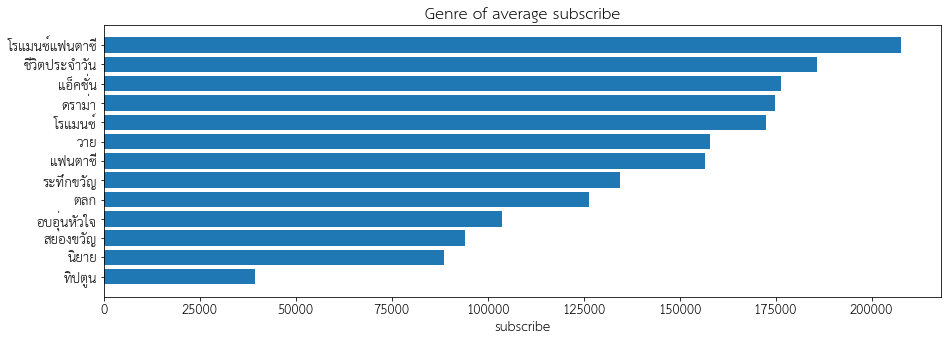

In [19]:
genre_subscribe2 = webtoon.groupby(['genre'])["subscribe"].median().sort_values(ascending=True)
plt.figure(figsize=(15,5))
plt.barh(genre_subscribe2.index, genre_subscribe2.values)
plt.title('Genre of average subscribe')
plt.xlabel('subscribe')
plt.show()


กราฟแสดงจำนวนของการ์ตูนแต่ละประเภทในเว็บตูน

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

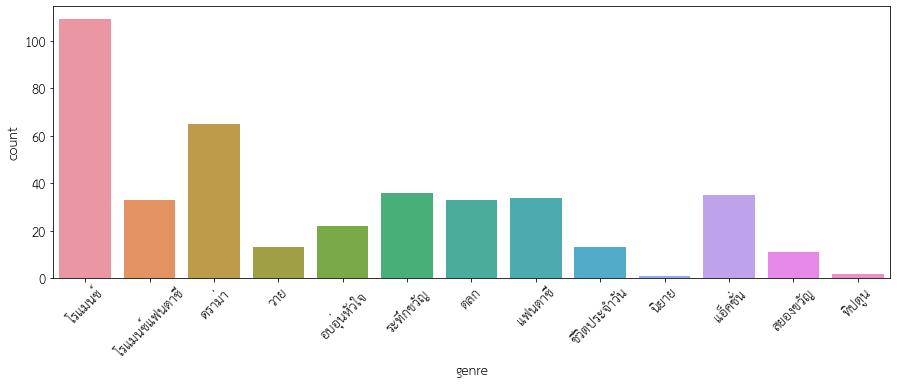

In [20]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="genre", data=webtoon)
plt.xticks(rotation=45) 

**สรุป** 

*  จะเห็นได้ว่าเรตติ้งของแต่ละประเภทของการ์ตูนจะใกล้เคียงกันมากอาจจะใช้สรุปไม่ได้ว่าการ์ตูนประเภทไหนความนิยมมากที่สุด 

*  ในส่วนของยอดไลค์จะเห็นได้ว่าการ์ตูนประเภทที่มียอดไลค์สูงโดดเด่นจากประเภทอื่นนั้น คือประเภทชีวิตประจำวันอาจจะเป็นเพราะว่าโดนเฉลี่ยแล้วการ์ตูนประเภทนี้โดนเฉลี่ยมีจำนวนตอนที่มากทำให้จำนวนยอดไลค์มาก 

*  จำนวนผู้ติดตามอาจเป็นสิ่งที่ดูยอดความนิยมของการ์ตูนเรื่องนั้นได้ดี โดยที่การ์ตูนประเภทที่มียอดผู้ติดตามมากที่สุดคือโรแมนซ์แฟนตาซี แล้วยังเป็นการ์ตูนที่มีจำนวนมากที่สุดด้วยที่อยู่ในเว็บตูน

### **จำนวนตอนของการ์ตูนมีผลต่อความนิยมอย่างไร?**

plot กราฟเปรียบเทียบ ยอดไลค์เฉลี่ยต่อจำนวนตอนของการ์ตูนแต่ละเรื่อง

<Figure size 1440x720 with 0 Axes>

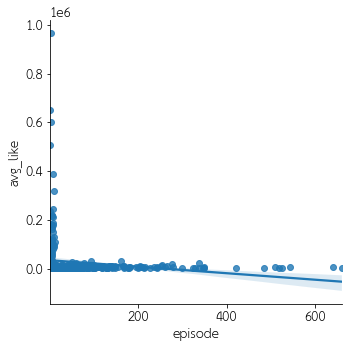

In [21]:
plt.figure(figsize=(20, 10))
sns.lmplot(data=webtoon, x='episode', y='avg_like')

กราฟแสดงจำนวนผู้ติดตามต่อจำนวนตอนของการ์ตูนแต่ละประเภท

<Figure size 1440x720 with 0 Axes>

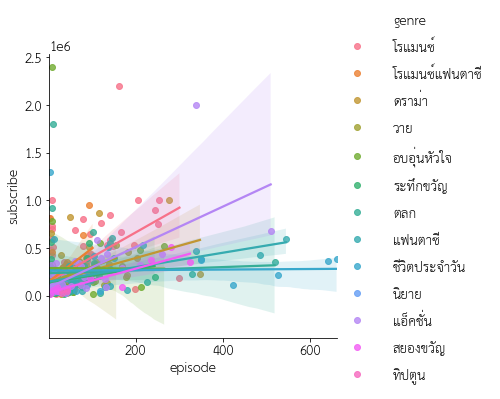

In [22]:
plt.figure(figsize=(20,10))
sns.lmplot(x="episode", y="subscribe", data=webtoon,hue="genre")

แสดงจำนวนตอนเฉลี่ยของการ์ตูนแต่ละประเภทด้วย barplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

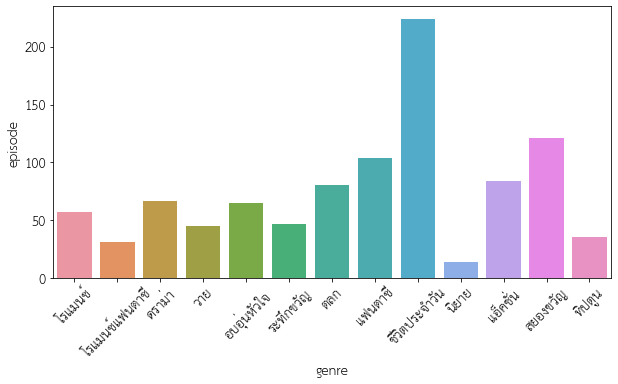

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x="genre", y="episode", data=webtoon, ci=None)
plt.xticks(rotation=45) 

**สรุป**

*  จากกราฟจำนวนตอนของการ์ตูนอาจจะไม่ส่งผลต่อยอดความนิยมมากนัก การ์ตูนบางเรื่องมียอดผู้ติดตามและยอดไลค์ที่มากแม้มีจำนวนตอนไม่มาก

*  การ์ตูนที่มีจำนวนตอนที่มากโดยเฉลี่ยจะเป็นการ์ตูนประเภทชีวิตประจำวัน

### **วันที่อัปโหลดการ์ตูนมีผลต่อความนิยมอย่างไร?**

เนื่องจากวันที่อัพโหลดจะมีการ์ตูนที่อัพโหลดมากกว่า 1 วันต่อสัปดาห์ แต่เป็นจำนวนน้อยเพื่อป้องกัน outlier จึงตัดออก

In [24]:
weekly = webtoon[webtoon['upload'].str.contains(r'วัน(?!$)')]

แสดงจำนวนยอดไลค์เฉลี่ยต่อวันที่อัพโหลดด้วย barplot

Text(0.5, 1.0, 'avg_like of upload day')

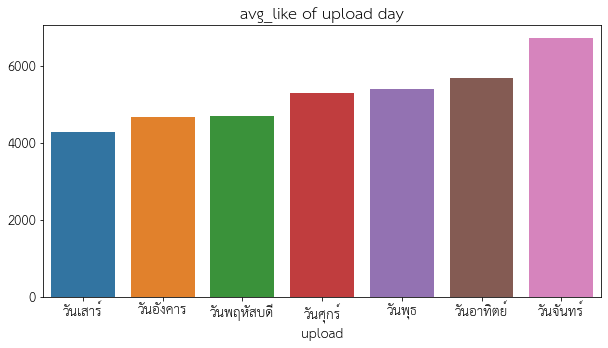

In [27]:
upload_like= weekly.groupby(['upload'])["avg_like"].median().sort_values(ascending=True)
plt.figure(figsize=(10,5))
sns.barplot(x=upload_like.index, y=upload_like.values)
plt.title('avg_like of upload day')

แสดงจำนวนยอดผู้ติดตามต่อวันที่อัพโหลดด้วย barplot

Text(0.5, 1.0, 'subscribe of upload day')

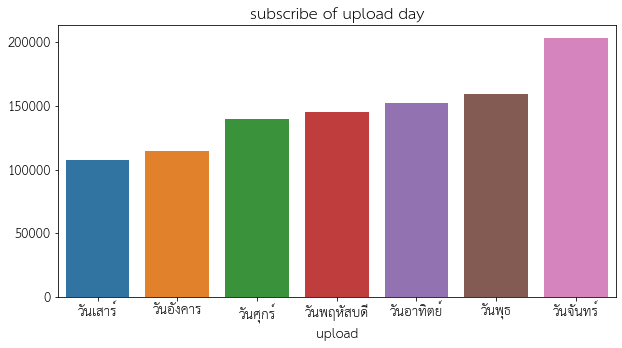

In [28]:
upload_subscribe= weekly.groupby(['upload'])["subscribe"].median().sort_values(ascending=True)
plt.figure(figsize=(10,5))
sns.barplot(x=upload_subscribe.index, y=upload_subscribe.values)
plt.title('subscribe of upload day')

แสดงประเภทการ์ตูนในวันจันทร์และวันพุธ

In [29]:
weekly[weekly['upload'] == 'วันจันทร์']['genre'].value_counts()

โรแมนซ์           8
โรแมนซ์แฟนตาซี    7
วาย               4
แอ็คชั่น          3
ดราม่า            3
แฟนตาซี           2
ระทึกขวัญ         1
Name: genre, dtype: int64

In [30]:
weekly[weekly['upload'] == 'วันพุธ']['genre'].value_counts()

โรแมนซ์           12
แฟนตาซี            3
โรแมนซ์แฟนตาซี     3
แอ็คชั่น           2
ระทึกขวัญ          2
ตลก                1
อบอุ่นหัวใจ        1
วาย                1
ดราม่า             1
Name: genre, dtype: int64

แสดงยอดจำนวนการ์ตูนที่อัพแต่ละวัน

In [31]:
weekly.upload.value_counts()

วันพฤหัสบดี    31
วันศุกร์       29
วันจันทร์      28
วันอังคาร      27
วันเสาร์       27
วันพุธ         26
วันอาทิตย์     25
Name: upload, dtype: int64

**สรุป**

*  จะเห็นได้ว่าจำนวนยอดความนิยมสูงที่สุดจะอยู่ในวันจันทร์ ในส่วนของวันอื่นๆก็จะมียอดที่ไม่แตกต่างกันมาก

*  วันที่มีการ์ตูนที่มียอดความนิยมมากนั้น จะมการ์ตูนประเภทโรแมนซ์แฟนตาซีอยู่

## **6. สรุปผล**

จากการวิเคราะห์ข้อมูลยอดความนิยมของการ์ตูนใน webtoon จะเห็นว่าประเภทการ์ตูนที่เป็นที่ยมมากที่สุดใน webtoon นั้นจะเป็นประเภทโรแมนซ์แฟนตาซี และวันที่อัปโหลดที่ทำให้การ์ตูนเป็นที่นิยมมากที่สุดคือวันจันทร์ซึ้งวันนี้ก็เป็นวันที่อัปโหลดการ์ตูนประเภทโรแมนซ์แฟนตาซีเป็นส่วนใหญ่ ในส่วนของจำนวนตอน จำนวนตอนที่มากอาจจะไม่ส่งผลต่อความนิยมมากนัก โดยที่การ์ตูนประเภทที่มีจำนวนตอนมากจะเป็นประเภทชีวิตประจำวัน